In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

### Load Data Set

In [11]:
DATA_PATH = os.path.join(os.getcwd(),'data','Position_Salaries.csv')
df = pd.read_csv(DATA_PATH)
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


### Clean Data

In [12]:
df.duplicated().sum()

0

In [13]:
df.isna().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [16]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


### Plot The Data

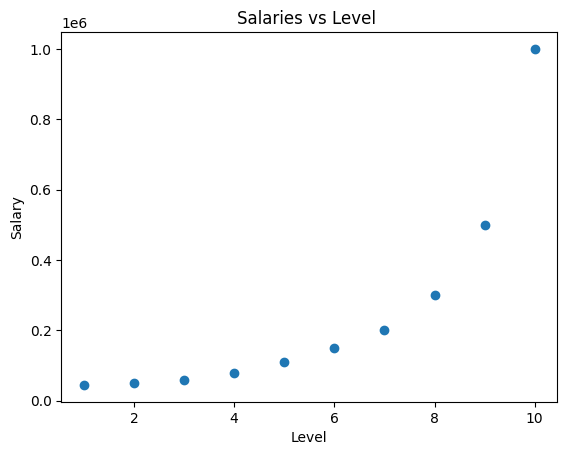

In [24]:
x = df['Level']
y = df['Salary']
plt.scatter(x,y)
plt.title('Salaries vs Level ')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

### Fitting The Graph Using Sklear Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [48]:
x_reshape = x.values.reshape(-1,1)

poly = PolynomialFeatures(degree=3,include_bias=False)
poly_features = poly.fit_transform(x_reshape)
print(poly_features)

lr = LinearRegression()
fit_poly = lr.fit(poly_features,y)

print(fit_poly.intercept_, fit_poly.coef_)

y_predict = lr.predict(poly_features)



[[   1.    1.    1.]
 [   2.    4.    8.]
 [   3.    9.   27.]
 [   4.   16.   64.]
 [   5.   25.  125.]
 [   6.   36.  216.]
 [   7.   49.  343.]
 [   8.   64.  512.]
 [   9.   81.  729.]
 [  10.  100. 1000.]]
-121333.33333333873 [180664.33566434 -48548.95104895   4120.04662005]


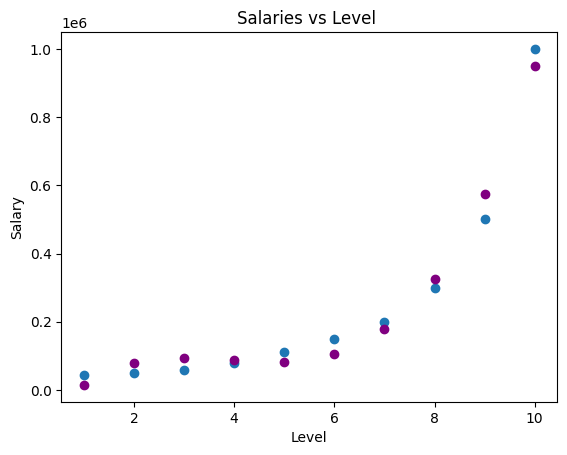

In [47]:
x = df['Level']
y = df['Salary']
plt.scatter(x,y)

plt.scatter(x,y_predict,color='purple')

plt.title('Salaries vs Level ')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

#### Plyaing With Polynmomials Degree

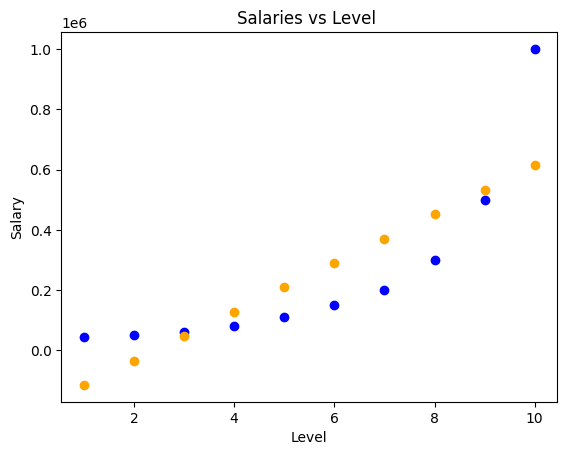

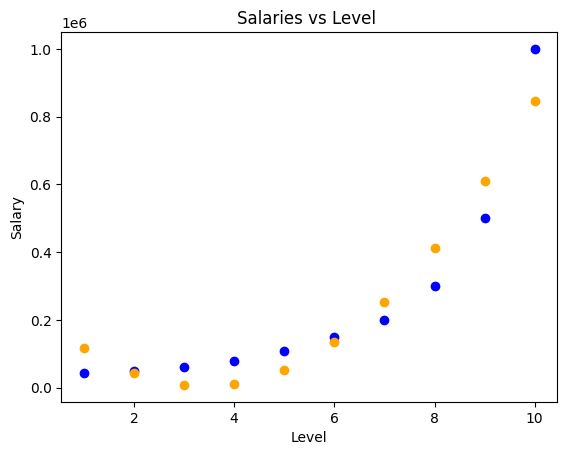

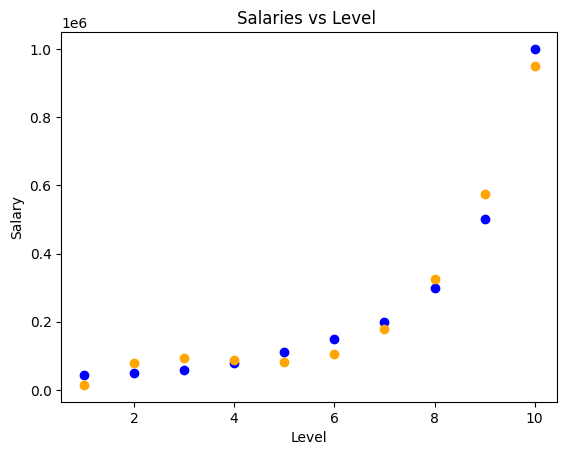

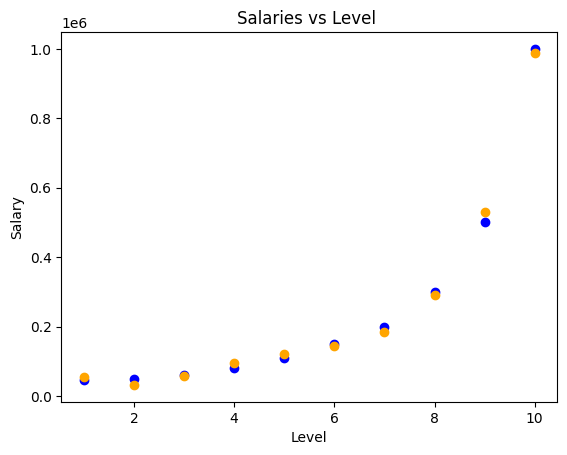

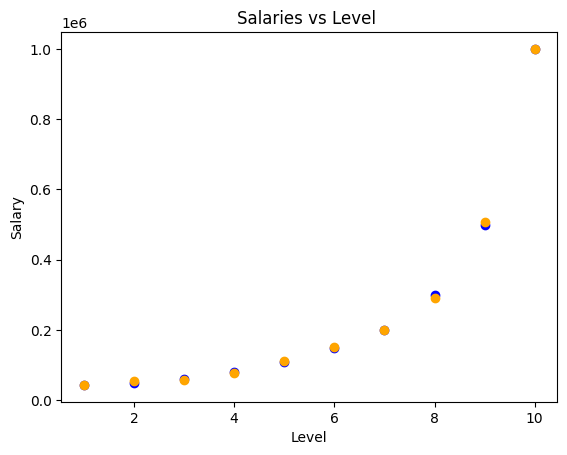

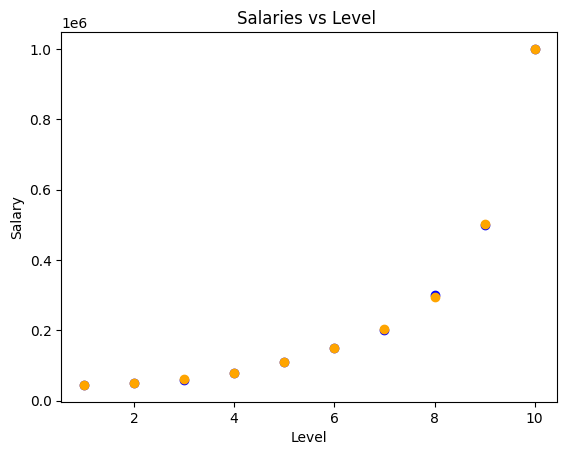

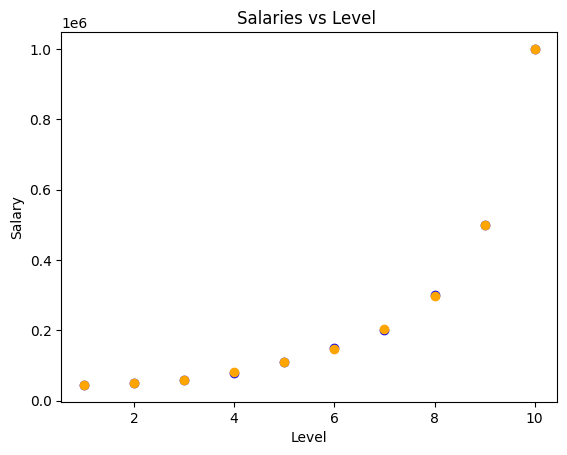

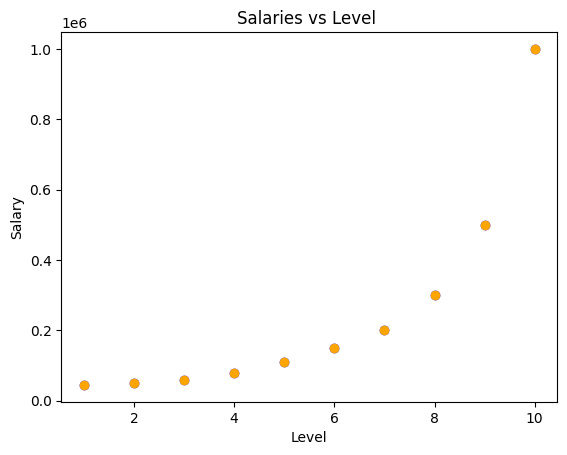

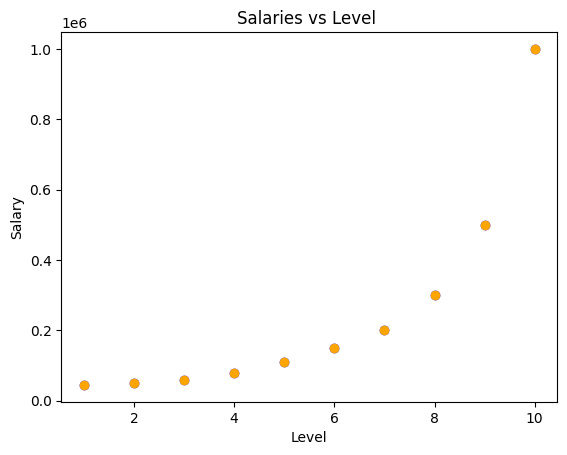

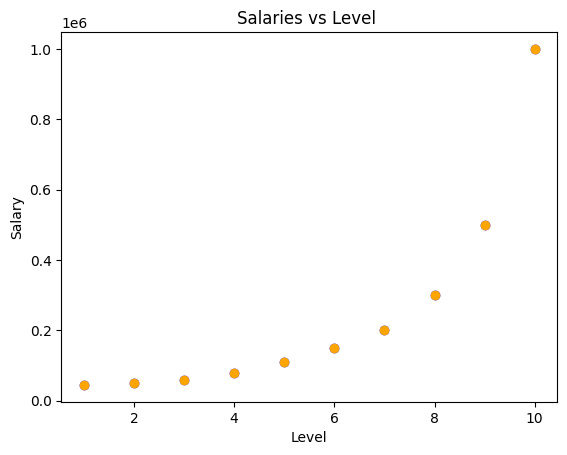

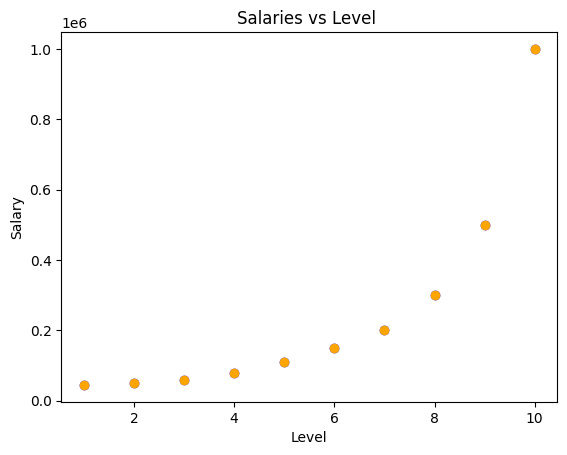

In [63]:
for d in np.arange(12):
    if d != 0:
        poly = PolynomialFeatures(degree=d,include_bias=False)
        poly_features = poly.fit_transform(x_reshape)
        
        lr = LinearRegression()
        fit_poly = lr.fit(poly_features,y)
             
        y_predict = lr.predict(poly_features)
    
        plt.scatter(x,y,color='blue')
        plt.scatter(x,y_predict,color='orange')
        
        plt.title('Salaries vs Level ')
        plt.xlabel('Level')
        plt.ylabel('Salary')
        plt.show()

## Observation
 - **The Model Overfitting** as it trying to get every possibility

## Lecture Demo (**9 - Polynomial features**)

In [64]:
from sklearn.preprocessing import PolynomialFeatures ,StandardScaler

In [66]:
df = pd.read_csv(os.path.join(os.getcwd(),'data','Salary_dataset.csv'))
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [68]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [73]:
##Prepare Features
x = df['YearsExperience']
y = df['Salary']
xin2dim = x.values.reshape(-1,1)

##### Ploting Features

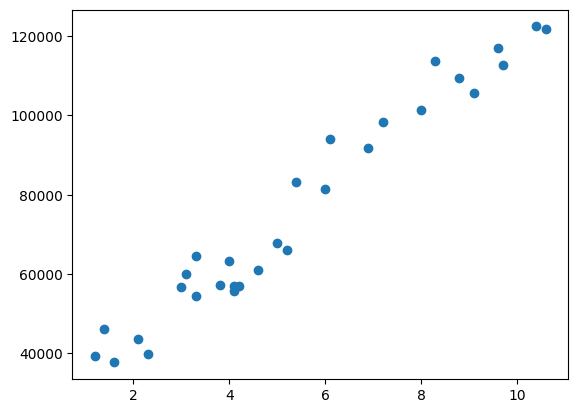

In [76]:
plt.scatter(x,y)
plt.show()

#### Applying Polynmial Features

#### Polynmilas Equation
#### **\begin{align}\tag {} x+x^{2x}+x^{3x}+x^{3x}+......+x^{nx}\end{align}**

#### Fitting Data using PolynomialFeatures ,StandardScaler

In [88]:
poly = PolynomialFeatures(degree=3)
poly_x = poly.fit_transform(xin2dim)

scl = StandardScaler()
x_scale = scl.fit_transform(poly_x)

lr = LinearRegression()
lr.fit(x_scale,y)

y_predict = lr.predict(x_scale)
y_predict

array([ 40450.10803313,  41207.61053571,  42094.71158472,  44840.73949236,
        46134.97342725,  51437.58327722,  52283.39793729,  54033.87655797,
        54033.87655797,  58718.94438019,  60701.03267509,  61712.28281673,
        61712.28281673,  62736.02029786,  66941.09376751,  71286.96527003,
        73497.9504339 ,  75726.43528632,  82457.88857603,  83578.76193502,
        92402.34906966,  95596.79486147, 103604.73737702, 106359.46155046,
       110571.08837446, 112837.86672045, 116118.25170094, 116693.05442524,
       119868.6312036 , 120481.22905764])

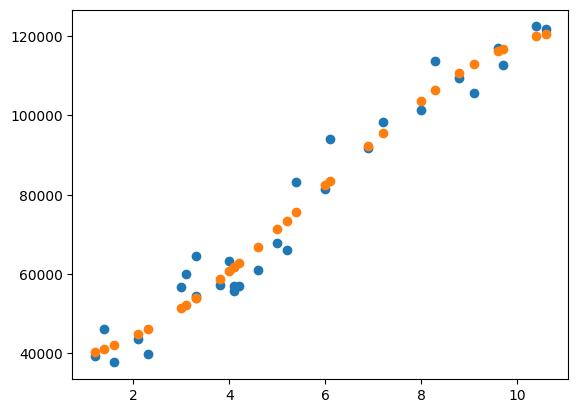

In [89]:
plt.scatter(x,y)
plt.scatter(x,y_predict)
plt.show()

In [90]:
lr.coef_ , lr.intercept_

(array([     0.        ,  -3187.13895425,  72124.82033269, -43682.57041936]),
 76004.0)

#### Overfitting Problem

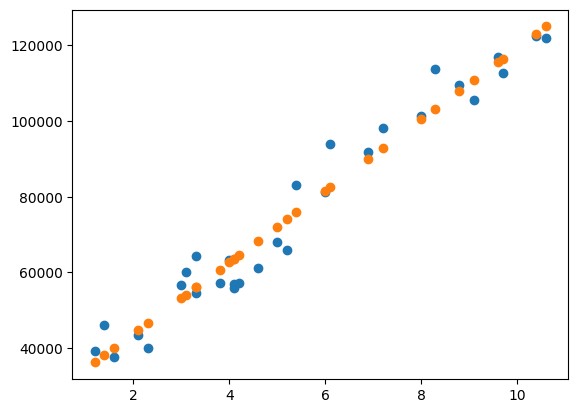

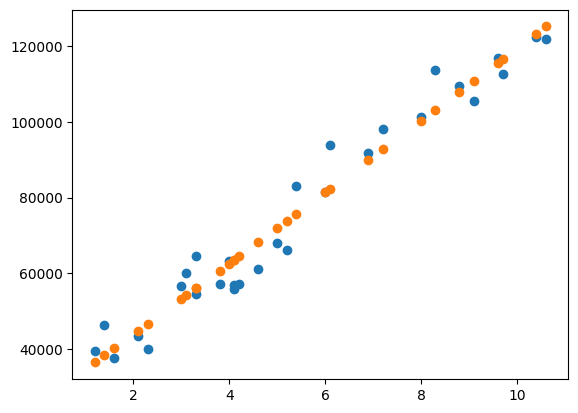

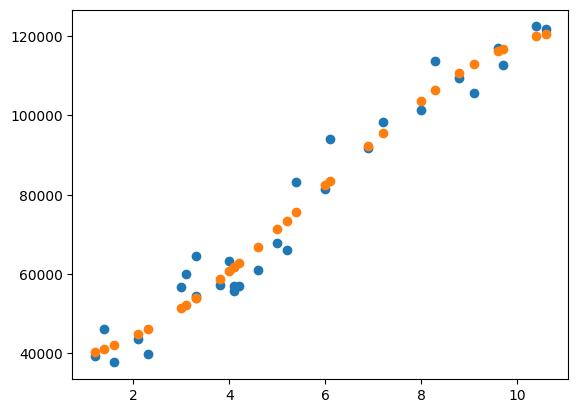

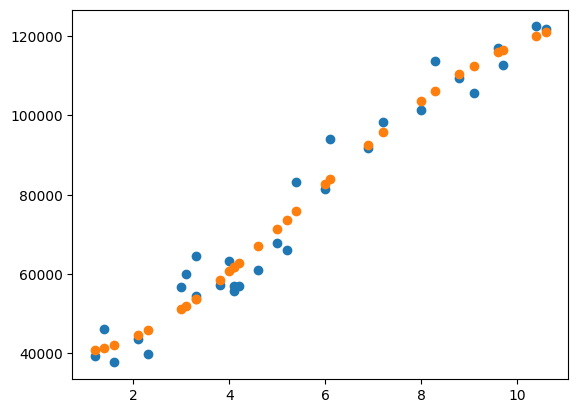

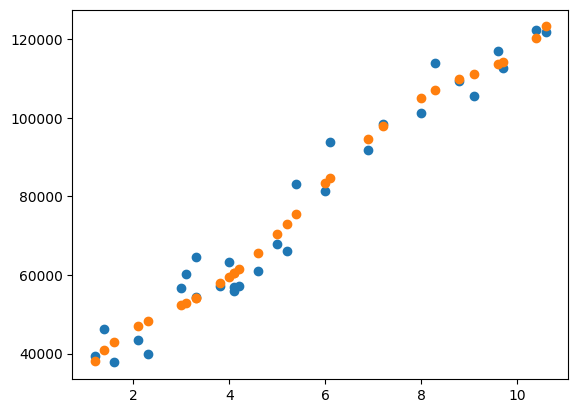

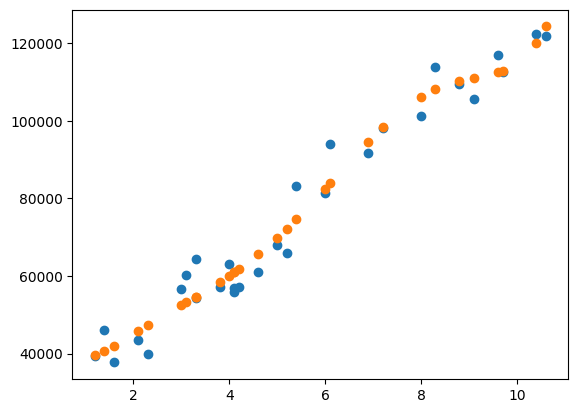

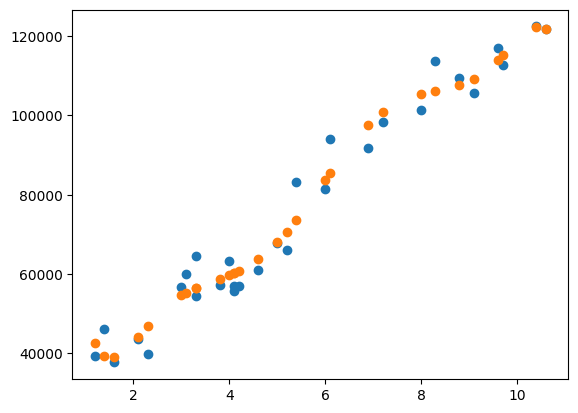

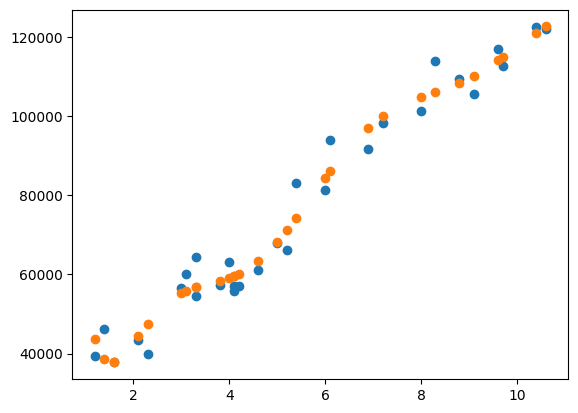

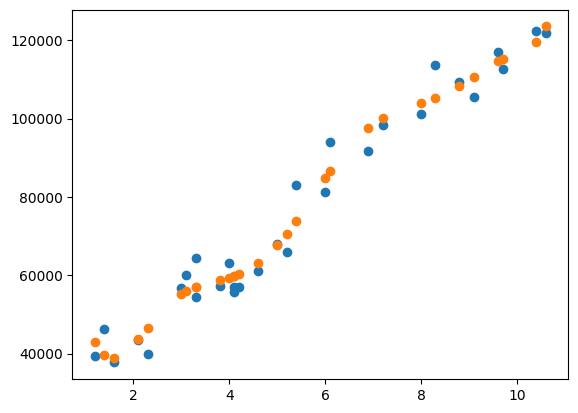

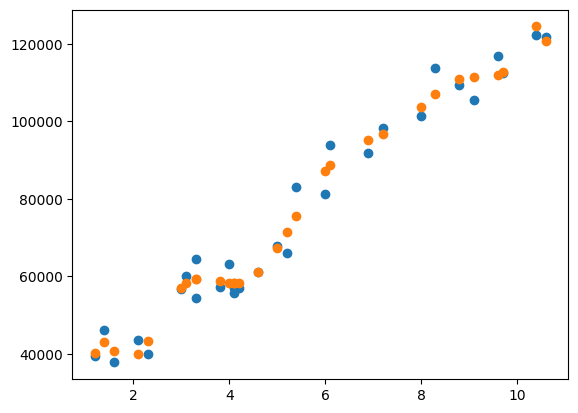

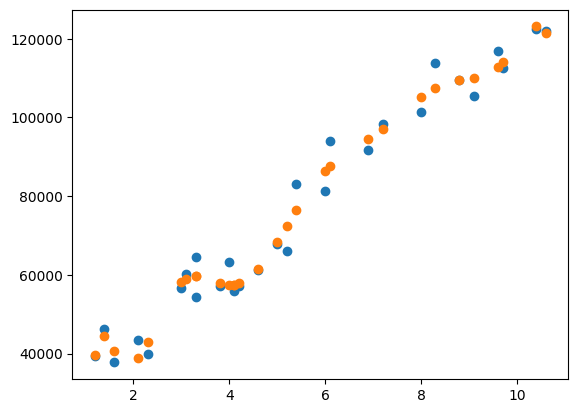

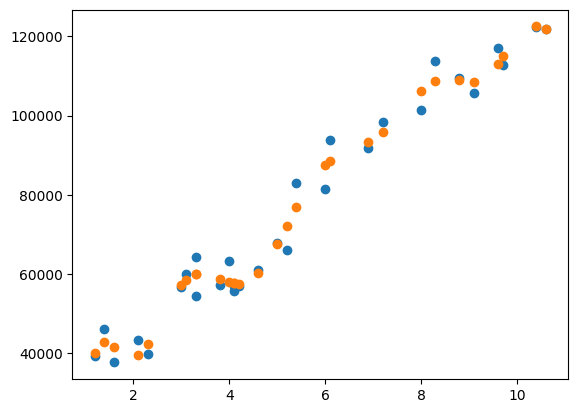

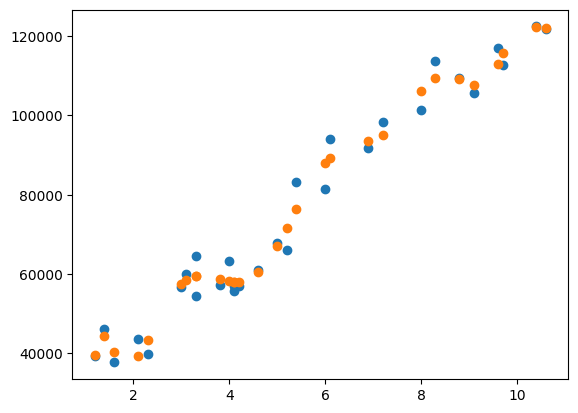

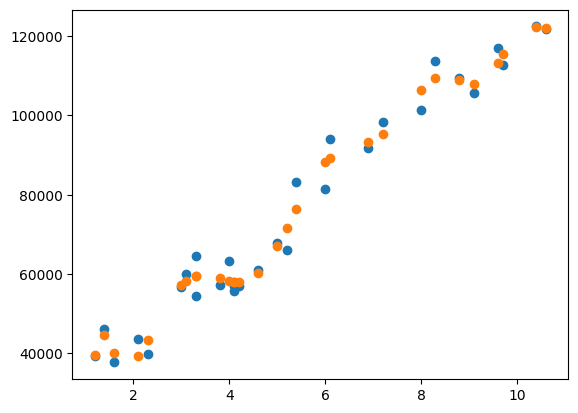

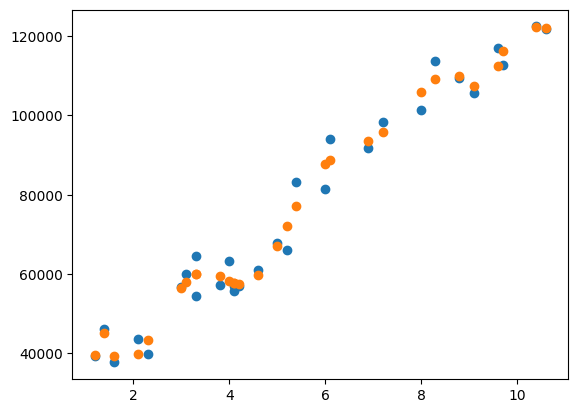

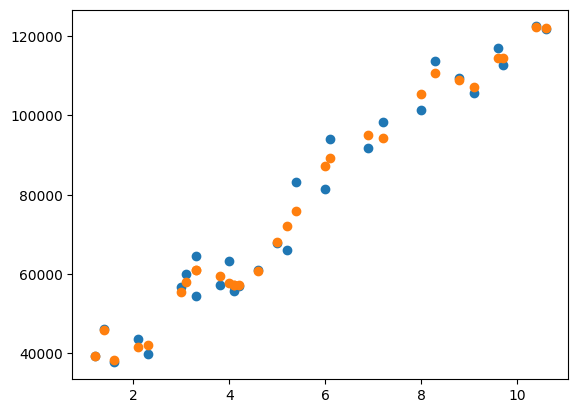

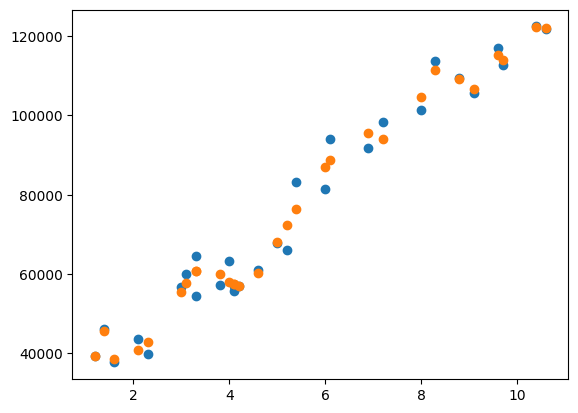

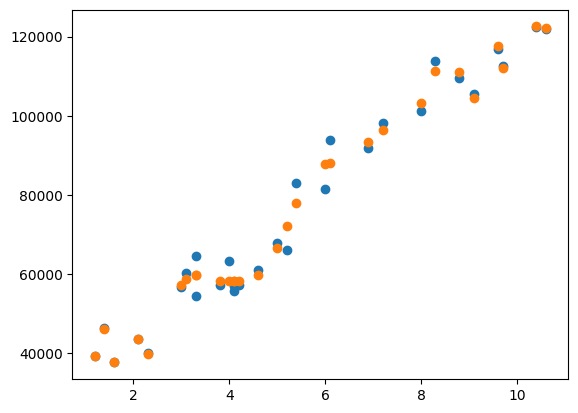

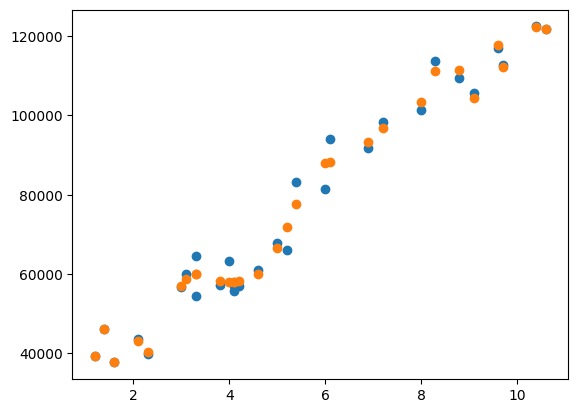

In [99]:
for d in range(1,20):
    poly = PolynomialFeatures(degree=d)
    poly_x = poly.fit_transform(xin2dim)
    
    scl = StandardScaler()
    x_scale = scl.fit_transform(poly_x)
    
    lr = LinearRegression()
    lr.fit(x_scale,y)
    
    y_predict = lr.predict(x_scale)
    
    plt.scatter(x,y)
    plt.scatter(x,y_predict)
    plt.show()

## Observation

#### If Degree Value Bacame high , the model try to cover every available options which leat to overfitting problem

In [91]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [93]:
mean_absolute_error(y,y_predict)

4269.070457553192

In [94]:
mean_squared_error(y,y_predict)

26446769.606837768

In [95]:
r2_score(y,y_predict)

0.9635969766249464

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#### Fitting Data using  PolynomialFeatures ,MinMaxScaler

In [111]:
# Transfer X To Poly Values From the third Degree
poly = PolynomialFeatures(degree=3)
poly_x = poly.fit_transform(xin2dim)
# As Value Of X Bacame Too High , We need to scale x
scl = MinMaxScaler()
x_scal = scl.fit_transform(poly_x)

#predition
lr = LinearRegression()
lr.fit(x_scal,y)

y_predict = lr.predict(x_scal)


array([ 40450.10803313,  41207.61053571,  42094.71158472,  44840.73949236,
        46134.97342725,  51437.58327722,  52283.39793729,  54033.87655797,
        54033.87655797,  58718.94438019,  60701.03267509,  61712.28281673,
        61712.28281673,  62736.02029786,  66941.09376751,  71286.96527003,
        73497.9504339 ,  75726.43528632,  82457.88857603,  83578.76193502,
        92402.34906966,  95596.79486147, 103604.73737702, 106359.46155046,
       110571.08837446, 112837.86672045, 116118.25170094, 116693.05442524,
       119868.6312036 , 120481.22905764])

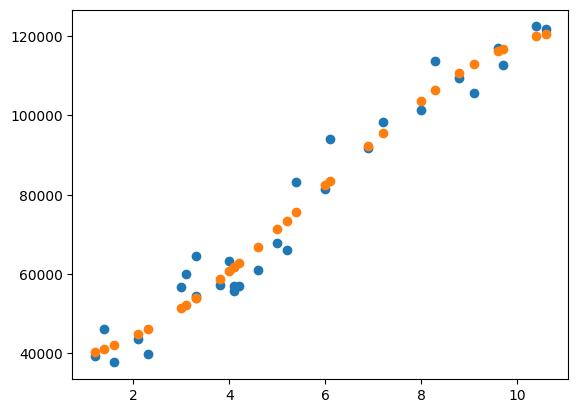

In [113]:
plt.scatter(x,y)
plt.scatter(x,y_predict)
plt.show()

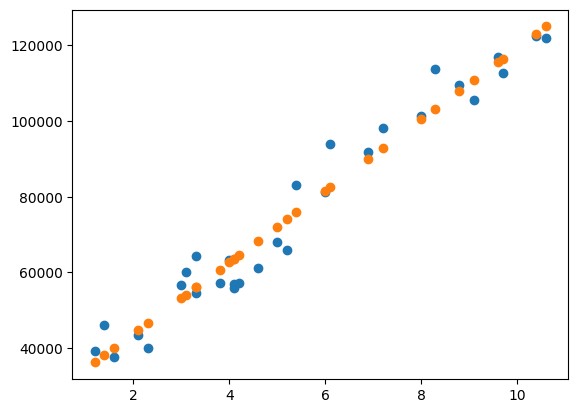

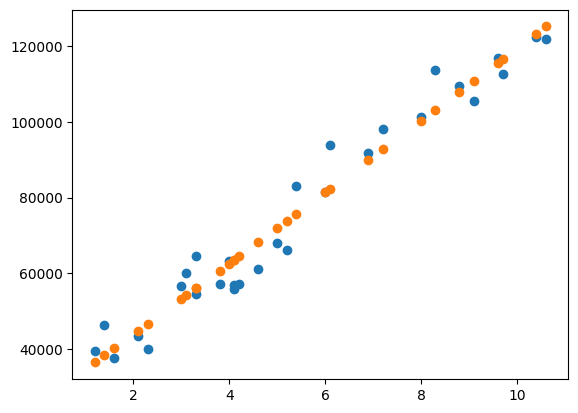

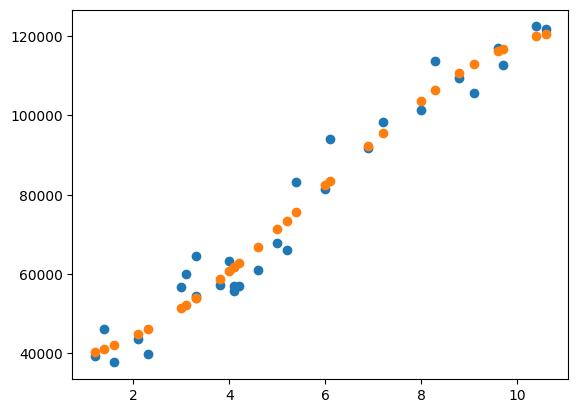

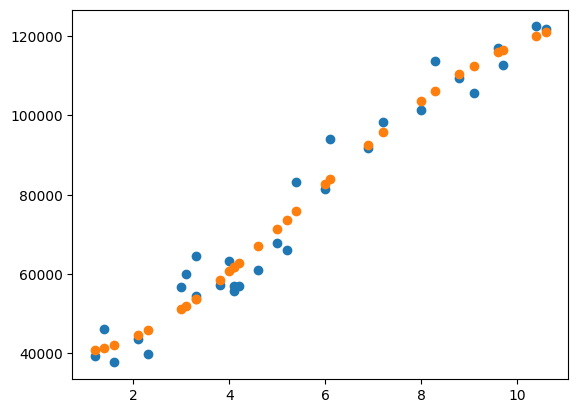

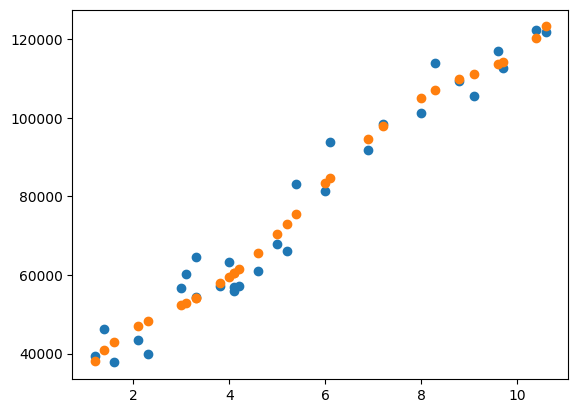

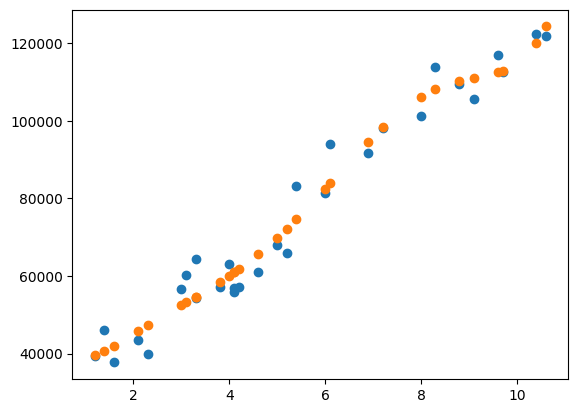

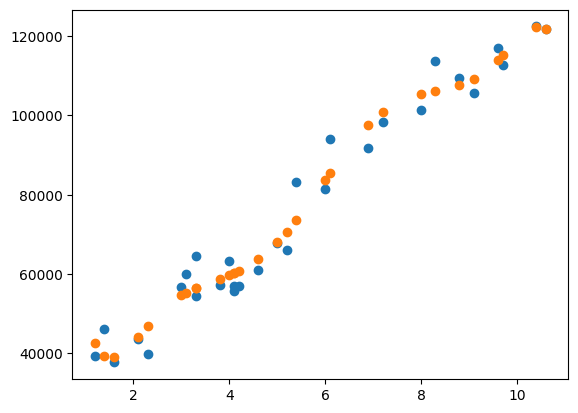

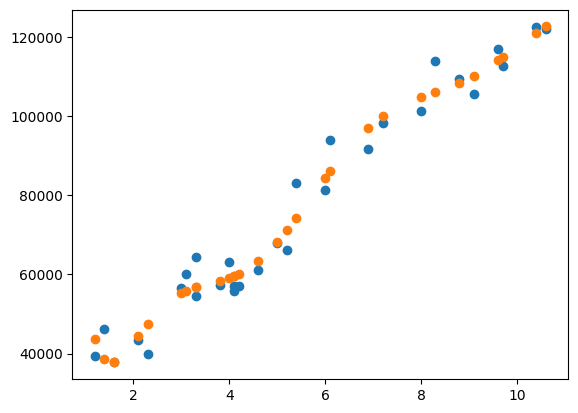

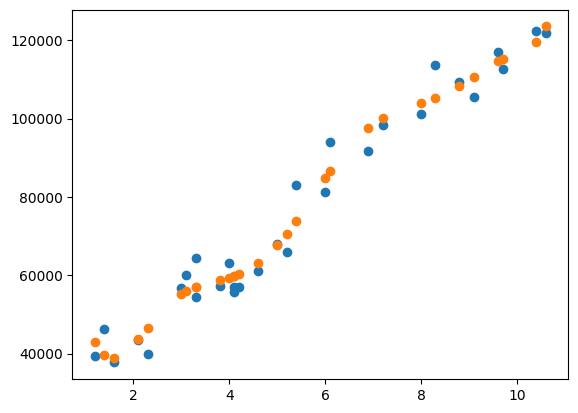

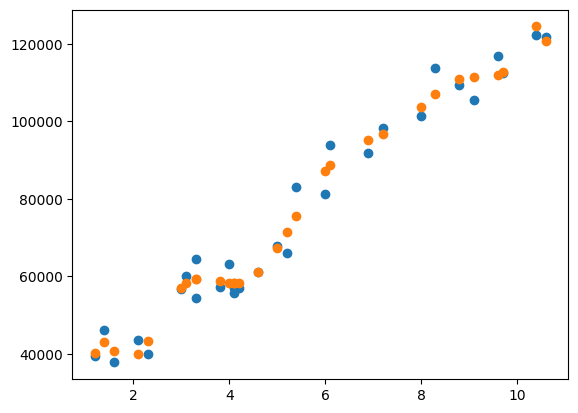

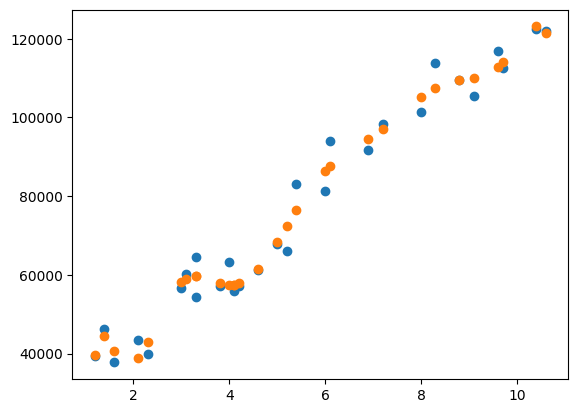

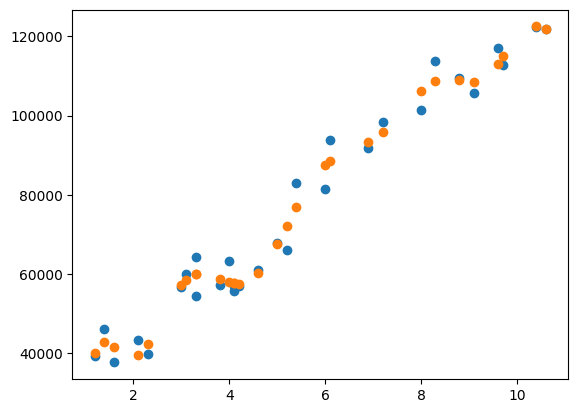

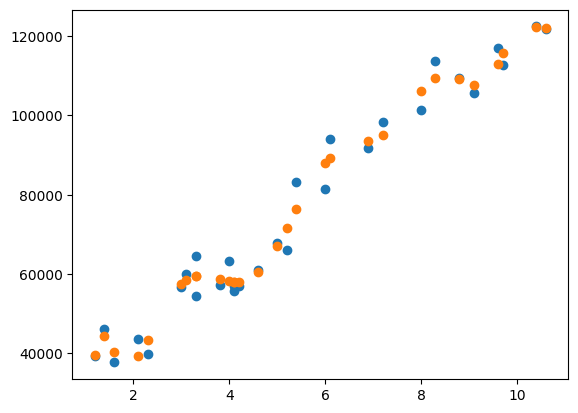

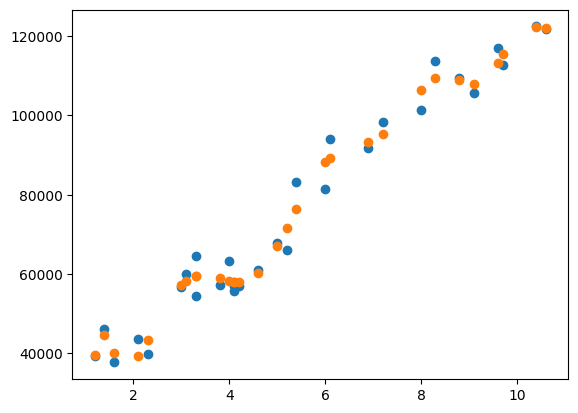

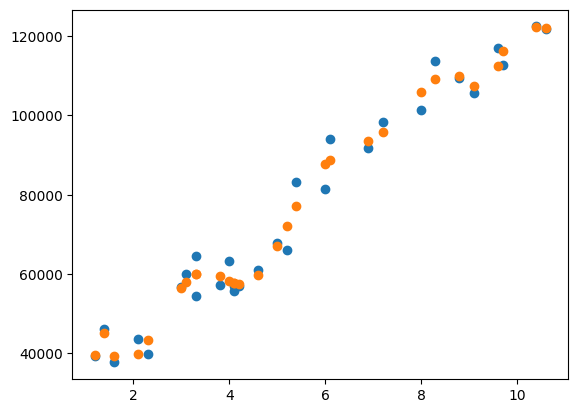

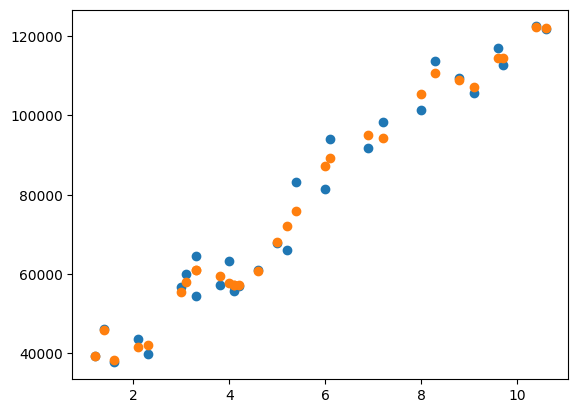

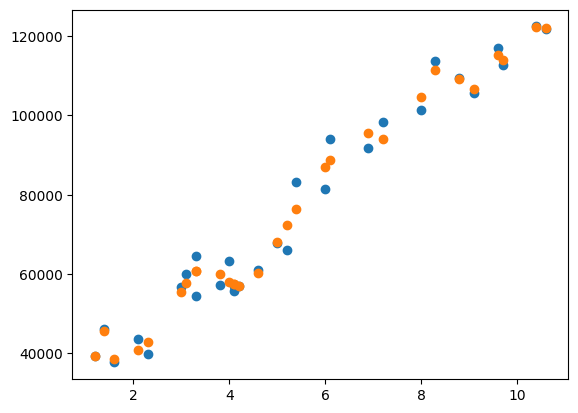

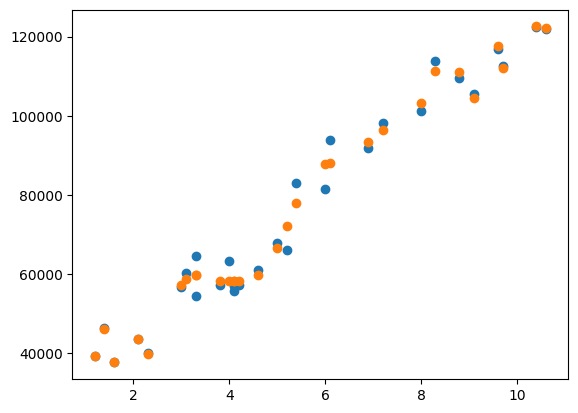

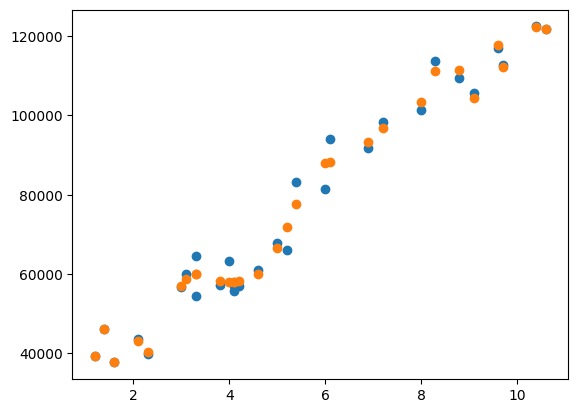

In [114]:
for d in range(1,20):
    poly = PolynomialFeatures(degree=d)
    poly_x = poly.fit_transform(xin2dim)
    
    scl = StandardScaler()
    x_scale = scl.fit_transform(poly_x)
    
    lr = LinearRegression()
    lr.fit(x_scale,y)
    
    y_predict = lr.predict(x_scale)

    plt.scatter(x,y)
    plt.scatter(x,y_predict)
    plt.show()

In [115]:
mean_absolute_error(y,y_predict)

2059.263468029088

In [116]:
mean_squared_error(y,y_predict)

8435509.666148994

In [117]:
r2_score(y,y_predict)

0.9883888255494948